# Create mask for NTFA based on a percentage threshold:

*Yiyu Wang - 2022 Oct*

Creates group-level, whole-brain mask for running NTFA (to reduce the number and voxels) by selecting voxels present for a certain % across the dataset. 

In [1]:
cd ../

/home/zulqarnain/Code/ntfa_rest/ntfa_degeneracy


In [2]:
from nilearn import image
from nilearn import plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')

In [3]:
# whole-brain 2mm mask (copied from my masks directory -- templateflow 2mm mask)
# using as a reference to save as smaller data type
ref = image.load_img('/data/zulqarnain/fmri_data//tpl-MNI152NLin6Asym_res-02_desc-brain_mask.nii')
ref.affine

array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [4]:
np.sum(ref.get_fdata())

228483.0

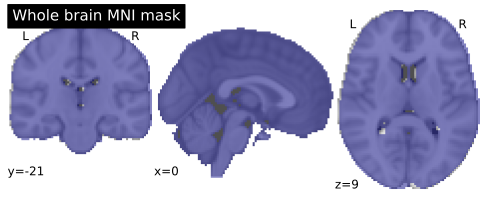

In [5]:
plotting.plot_roi(ref, draw_cross=False, title="Whole brain MNI mask")
plt.show()

In [6]:
fmriprep_dir = '/data/zulqarnain/fmri_data/aging_data_fmriprep/'
GM_files = glob.glob(fmriprep_dir + "/**/anat/*MNI*GM_probseg.nii.gz")

In [7]:
GM_files

['/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-220/anat/sub-220_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-276/anat/sub-276_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-154/anat/sub-154_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-280/anat/sub-280_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-163/anat/sub-163_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-197/anat/sub-197_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz']

In [9]:
glob.glob(fmriprep_dir + "/**/**/anat/*MNI*GM_probseg.nii.gz") + GM_files

['/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-194/ses-1/anat/sub-194_ses-1_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-193/ses-1/anat/sub-193_ses-1_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-241/ses-1/anat/sub-241_ses-1_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-242/ses-1/anat/sub-242_ses-1_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-240/ses-1/anat/sub-240_ses-1_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-195/ses-1/anat/sub-195_ses-1_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-220/anat/sub-220_space-MNI152NLin6Asym_res-2_label-GM_probseg.nii.gz',
 '/data/zulqarnain/fmri_data/aging_data_fmriprep/sub-276/ana

In [10]:
# take all masks from the fmriprep:

fmriprep_dir = '/data/zulqarnain/fmri_data/aging_data_fmriprep/'
GM_files = glob.glob(fmriprep_dir + "/**/anat/*MNI*GM_probseg.nii.gz")
GM_files = GM_files + glob.glob(fmriprep_dir + "/**/**/anat/*MNI*GM_probseg.nii.gz")
# include_sub = pd.read_csv('/work/abslab/AVFP/Preproc_Scripts/included_AVFP_novel_subjects.csv', header = None)
# subs = []
# for s in include_sub[0]:
#     subs.append(str(s))
subs = ['193', '194', '195', '197', '154', '163', '220']
GM_prob_files = [[i for i in GM_files if s in i] for s in subs]
print(len(GM_prob_files))


7


In [11]:
GM = image.load_img(GM_prob_files)
group_GM = image.mean_img(GM)
group_GM.shape

(91, 109, 91)

In [12]:
# convert to binary (where, at the group level, prob GM > 25%)
group_GM_binary = np.where(group_GM.get_fdata() > .25, 1, 0)

# convert to nilearn image
group_GM_img = image.new_img_like(ref, group_GM_binary, copy_header=True)
group_GM_img.to_filename('/data/zulqarnain/fmri_data/aging_data_fmriprep/masks/GM_fmriprep_spreng_rest_mask_N' + str(len(GM_prob_files)) + '.nii.gz')
# group_GM_img.to_filename('/work/abslab/Yiyu/AVFP_analysis/masks/GM_fmriprep_novelgroup_mask_N' + str(len(GM_prob_files)) + '.nii.gz')
# group_GM_img.to_filename('/work/abslab/Yiyu/NTFA_AVFP/masks/GM_fmriprep_novelgroup_mask_N' + str(len(GM_prob_files)) + '.nii.gz')

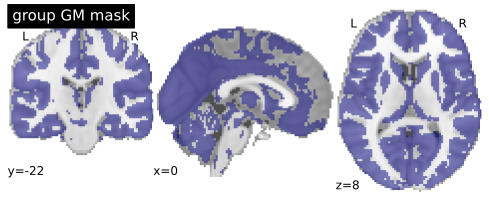

142880.0


In [13]:
plotting.plot_roi(group_GM_img, draw_cross=False, title="group GM mask")
plt.show()
print(np.sum(group_GM_img.get_fdata()))